In [1]:
from pymongo import MongoClient, ASCENDING, DESCENDING
%matplotlib inline
from ggplot import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv
from pandas import DataFrame
import pandas as pd
import numpy as np
from bson import Code

In [2]:
client = MongoClient()
anycast = client.anycast_monitoring

In [39]:
col_map = {
    '00': 'RIPE NCC (Ams)',
    '01': 'LINX, London',
    '02': 'SFINX, Paris',
    '03': 'AMS-IX & NL-IX',
    '04': 'CIXP, Geneva',
    '05': 'VIX, Vienna',
    '06': 'Otemachi, Japan',
    '07': 'Stockholm, Sweden',
    '08': 'San Jose (CA), USA',
    '09': 'Zurich, Switzerland',
    '10': 'Milan, Italy',
    '11': 'New York (NY), USA',
    '12': 'Frankfurt, Germany',
    '13': 'Moscow, Russia',
    '14': 'Palo Alto, USA',
    '15': 'Sao Paulo, Brazil',
    '16': 'Miami, USA',
    '18': 'CATNIX, Barcelona',
    '19': 'NAP Africa Johannesburg',
    '20': 'SwissIX, Zurich',
    '21': 'France-IX, Paris',
}

c = anycast['c_root']

c.find_one()

{'_id': ObjectId('57726e3afa6b7b5421dc9487'),
 'collector': '14',
 'path4': [1280, 174, 2149],
 'path6': [1280, 174, 2149],
 'peer': 1280,
 'timestamp': 1396310400}

## Which collectors peer with peers with shorter IPv4 path?

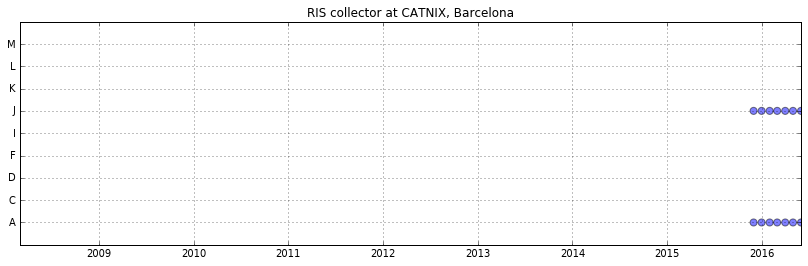

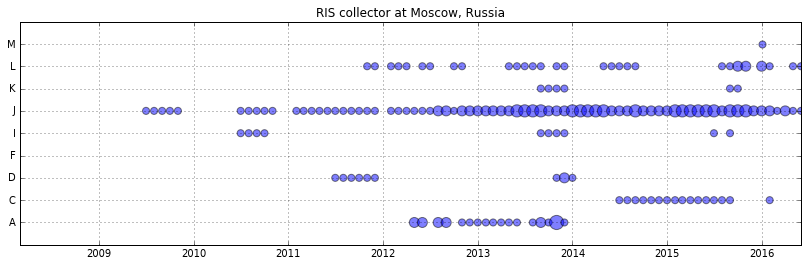

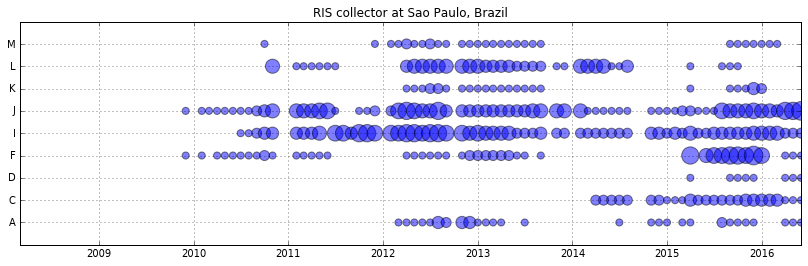

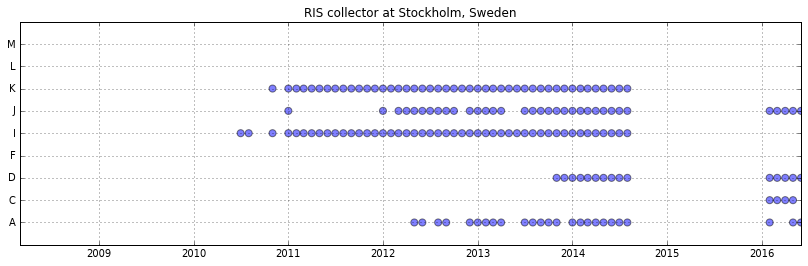

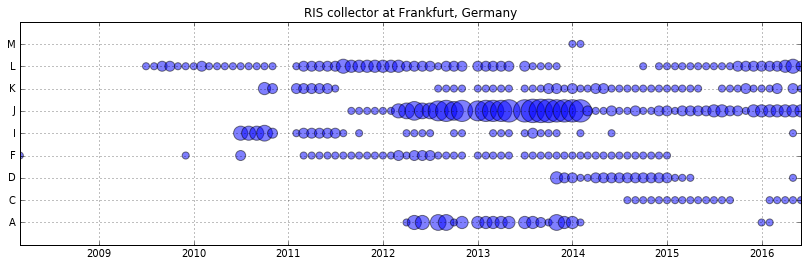

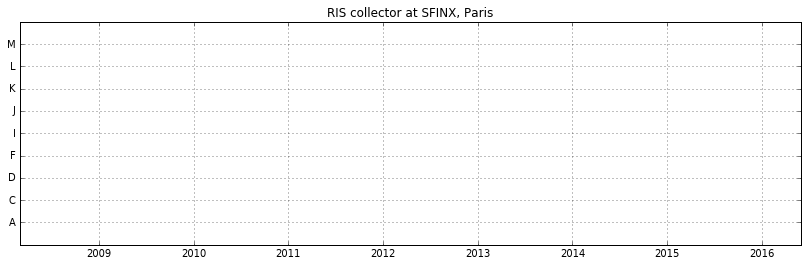

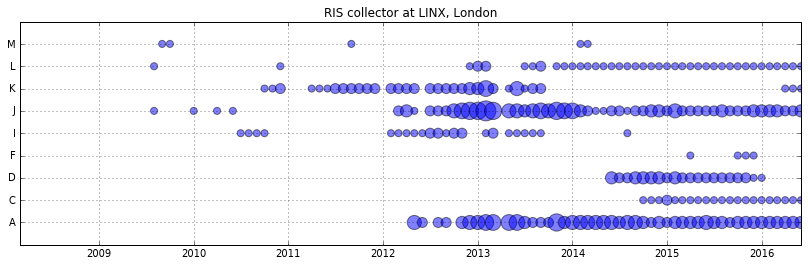

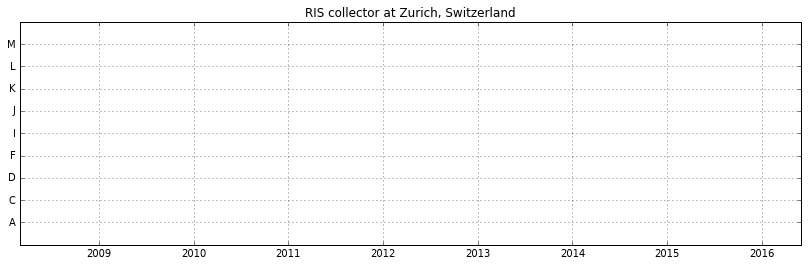

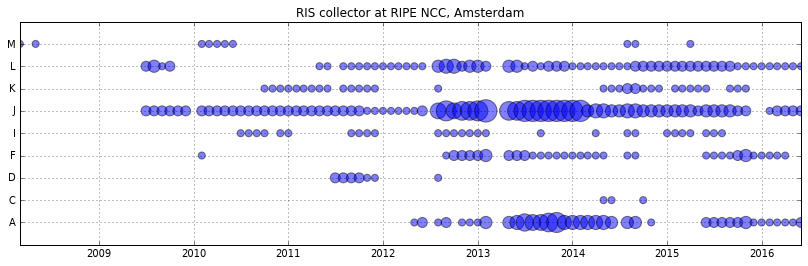

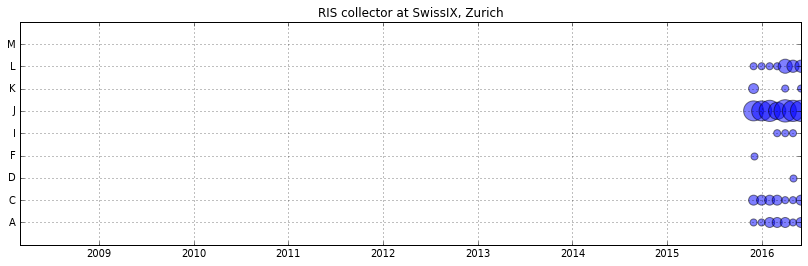

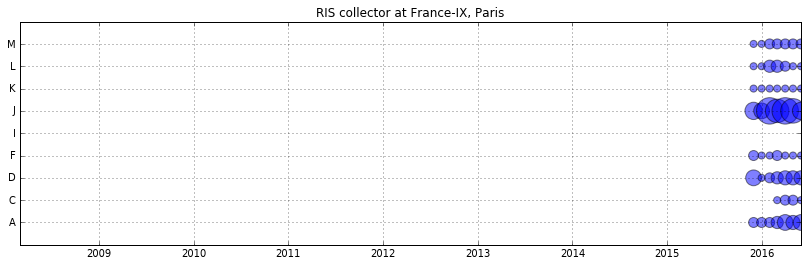

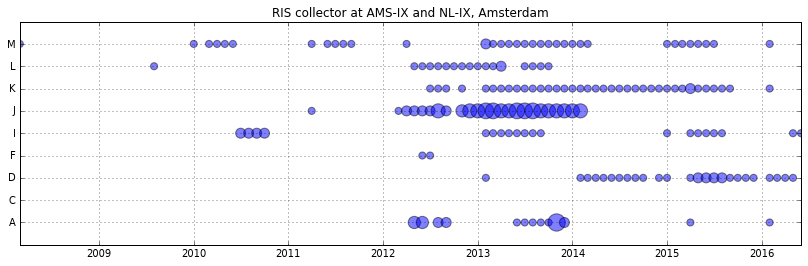

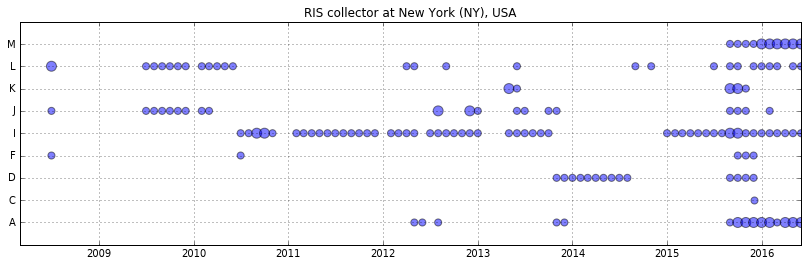

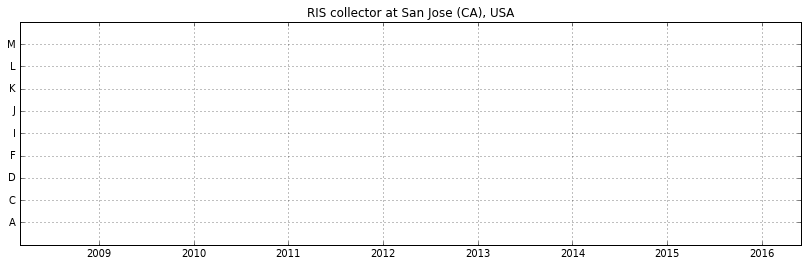

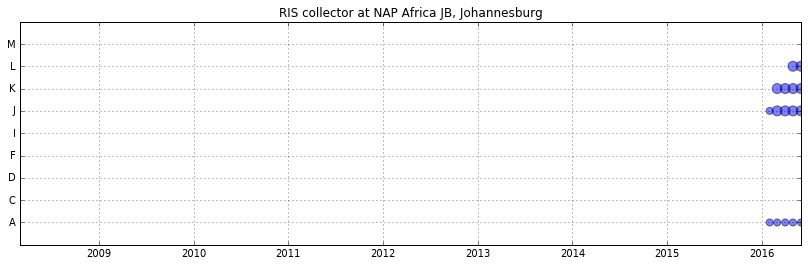

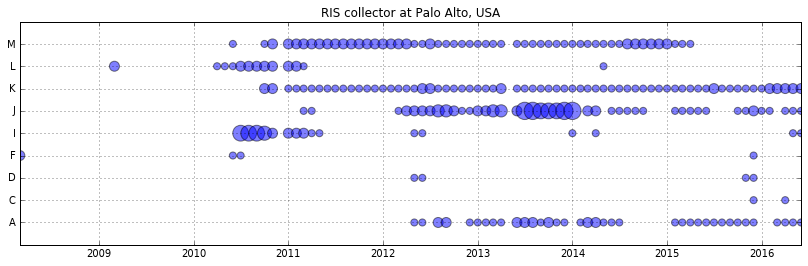

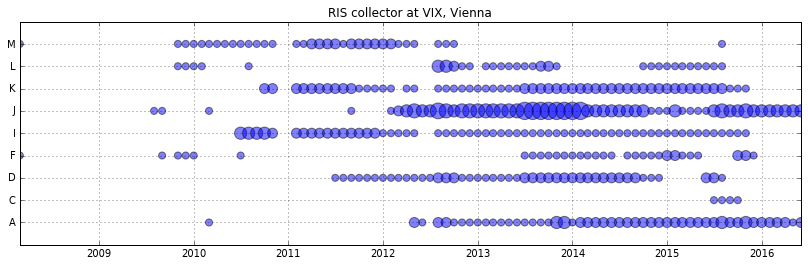

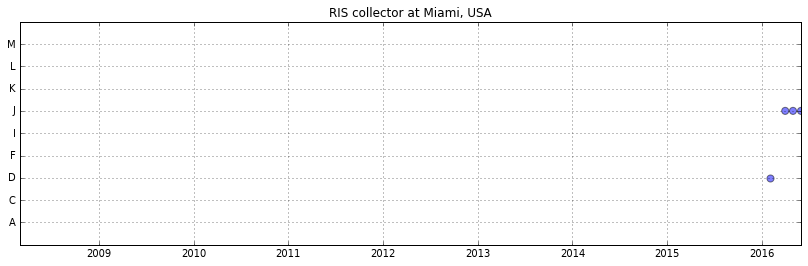

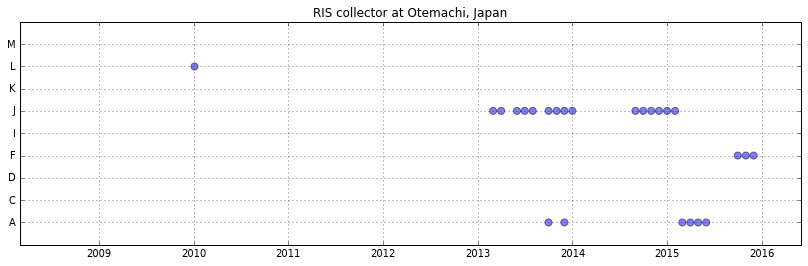

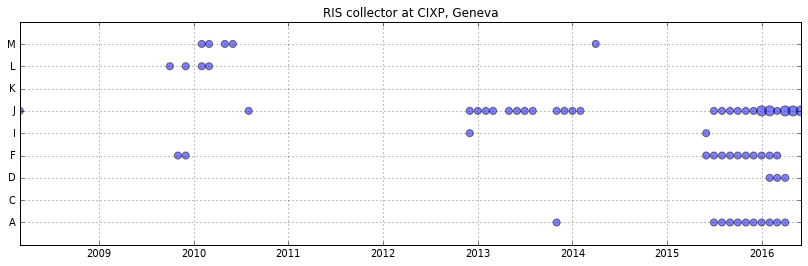

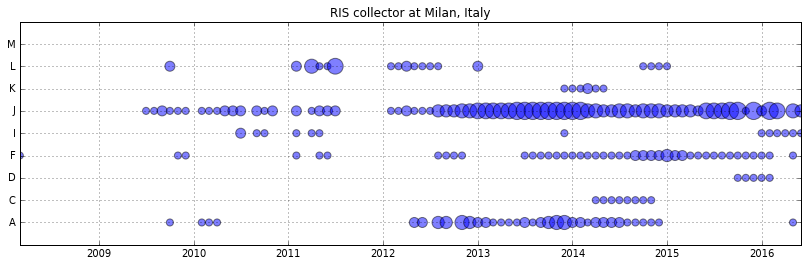

In [5]:
where_query = """
function() {
    if(this.path4.length < this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.count++;
    }
""")

root_list = 'acdfijklm'


container = {}
for collector in col_map:
    fig, axes = plt.subplots(figsize=(14,4), sharex=True, sharey=True)
    
    for root in root_list:
        coll = anycast['{}_root'.format(root)]
        counter = 0
        res = coll.group(key={'timestamp':1}, condition={'collector': collector, '$where': where_query}, initial={'count': 0, 'root': root_list.index(root) + 1}, reduce=reducer)
        if res:
            container[collector] = DataFrame(res)
            container[collector]['timestamp'] = pd.to_datetime(container[collector]['timestamp'] * 1000000000)
            container[collector] = container[collector].set_index(['timestamp'])

            # plot
            axes.scatter(container[collector].index, container[collector]['root'], s=container[collector]['count'] * 50, alpha=0.5)
    
    axes.set_xlim([pd.datetime(2008,3,1), pd.datetime(2016,6,1)])
    axes.set_ylim([0, 10])

    start, end = axes.get_ylim()
    axes.yaxis.set_ticks(np.arange(start, end, 1))
    axes.yaxis.set_ticklabels(['', 'A','C','D','F', 'I', 'J', 'K', 'L', 'M'])
    
    axes.grid(True)
    axes.set_title('RIS collector at {}'.format(col_map[collector]))
    
    plt.show()


    

###  only for tests. Ignore

In [133]:
where_query = """
function() {
    if(this.path4.length < this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.count++;
    }
""")

root_list = 'acdfijklm'
collector = '02'

container = {}
    
for root in root_list:
    print('root{}'.format(root))
    coll = anycast['{}_root'.format(root)]
    counter = 0
#     res = coll.group(key={'timestamp':1}, condition={'collector': collector, '$where': where_query}, initial={'count': 0, 'root': root_list.index(root) + 1}, reduce=reducer)
#     for item in res:
#         print(item)
    for item in coll.find({'collector': collector}):
        print(item)


roota
rootc
rootd
rootf
rooti
rootj
rootk
rootl
rootm


## Which collectors peer with peers with shorter IPv6 path?

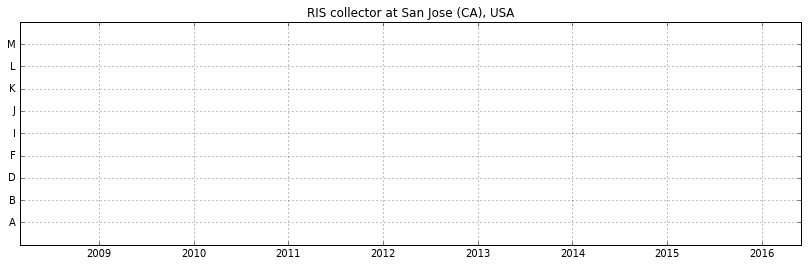

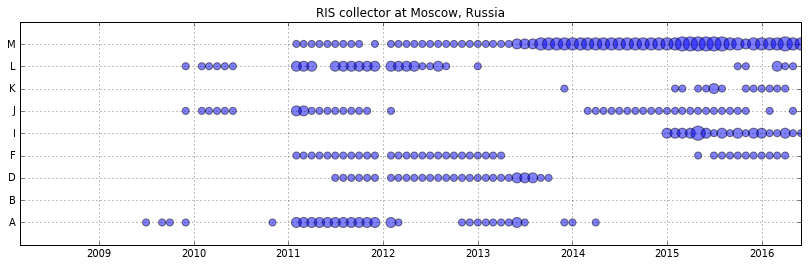

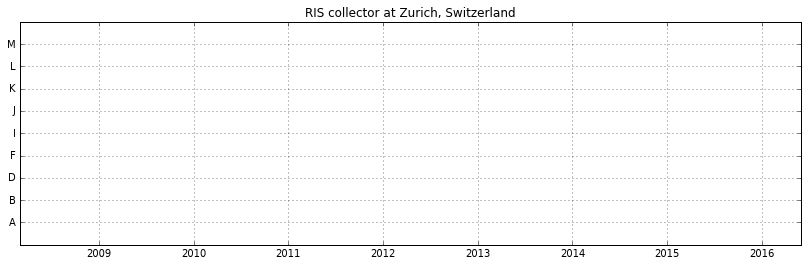

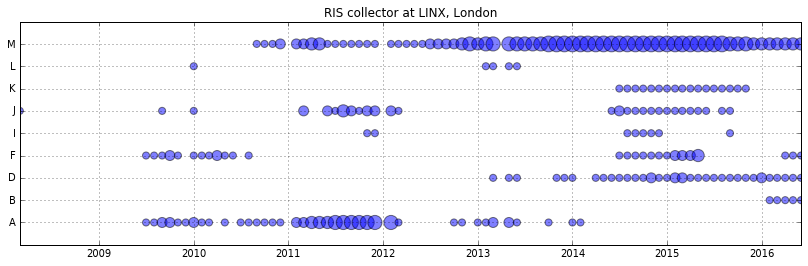

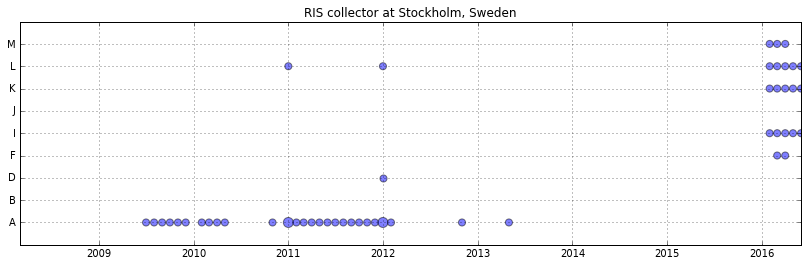

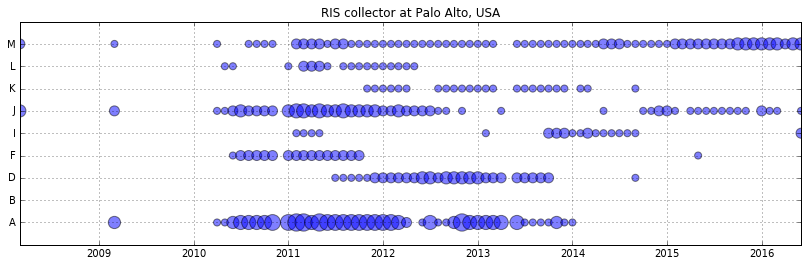

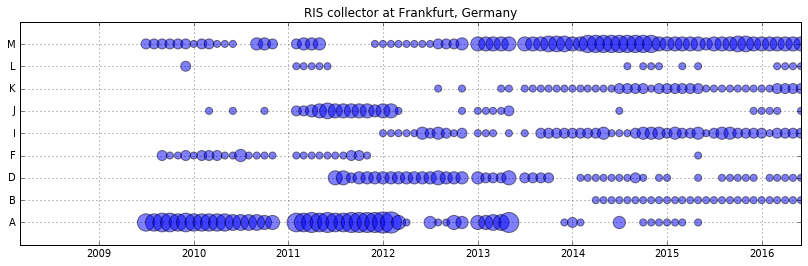

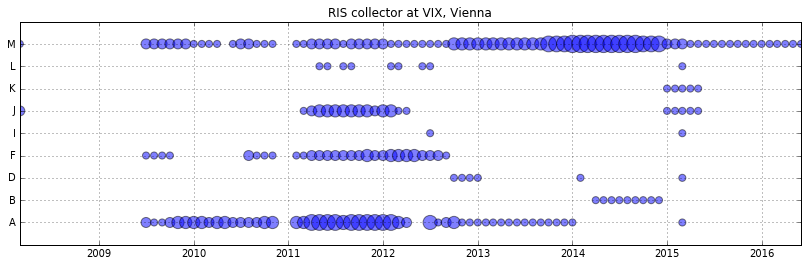

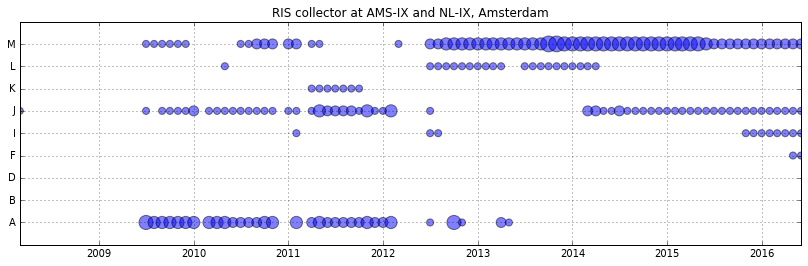

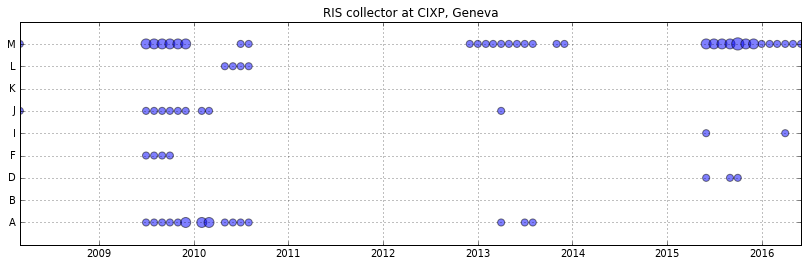

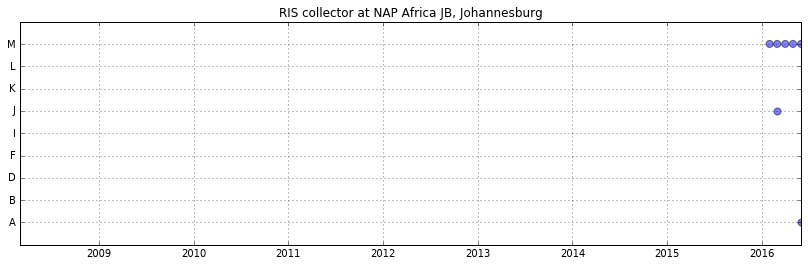

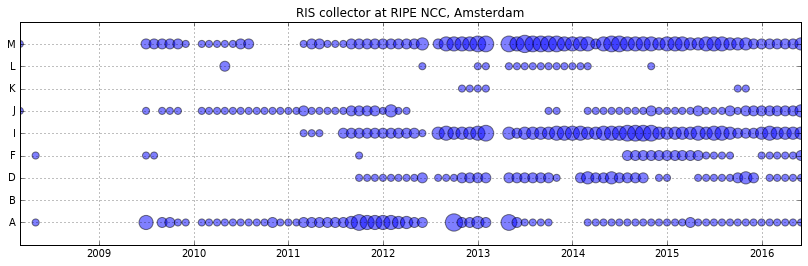

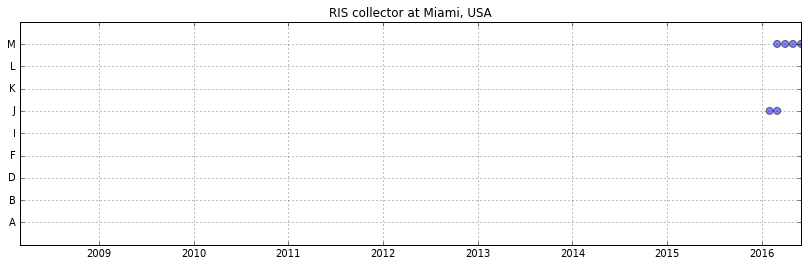

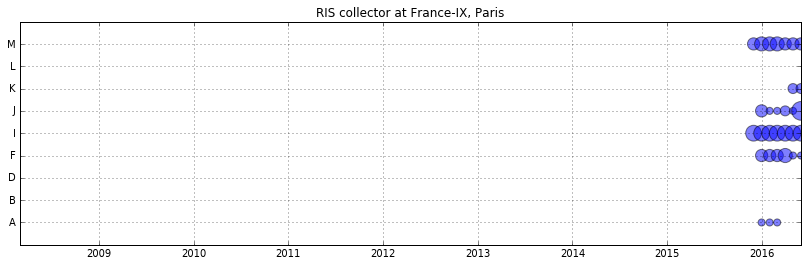

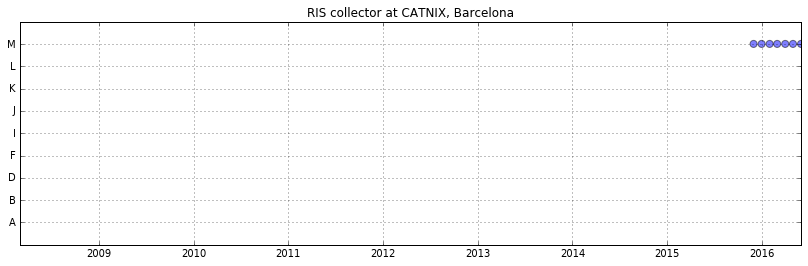

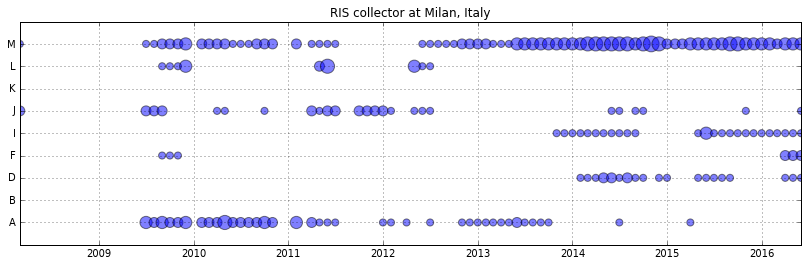

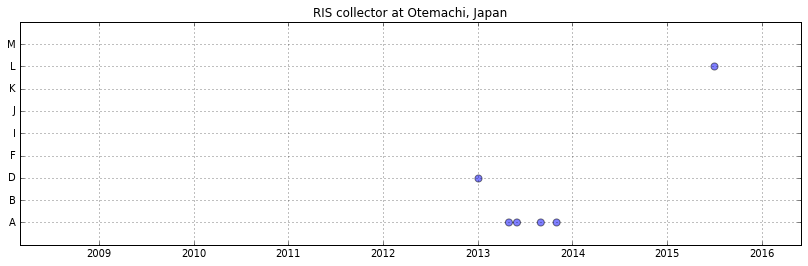

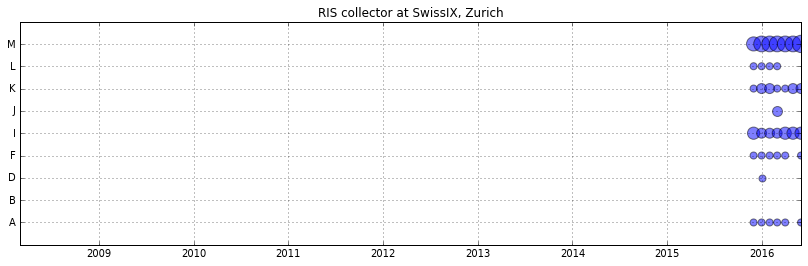

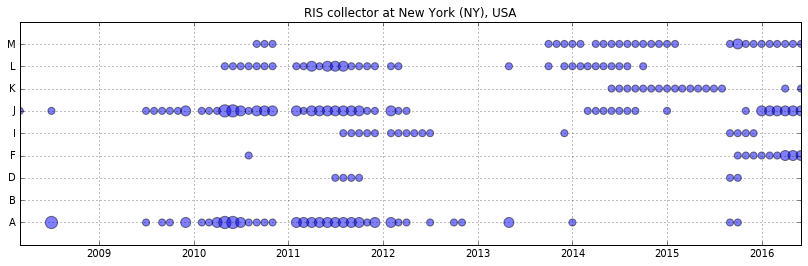

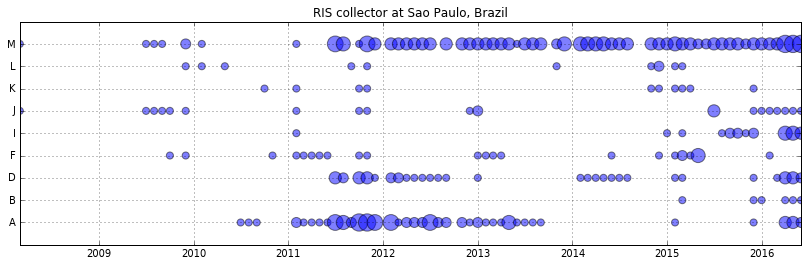

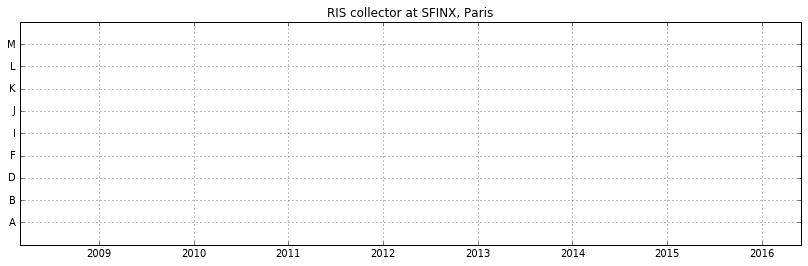

In [139]:
where_query = """
function() {
    if(this.path4.length > this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.count++;
    }
""")

root_list = 'acdfijklm'


container = {}
for collector in col_map:
    fig, axes = plt.subplots(figsize=(14,4), sharex=True, sharey=True)
    
    for root in root_list:
        coll = anycast['{}_root'.format(root)]
        counter = 0
        res = coll.group(key={'timestamp':1}, condition={'collector': collector, '$where': where_query}, initial={'count': 0, 'root': root_list.index(root) + 1}, reduce=reducer)
        if res:
            container[collector] = DataFrame(res)
            container[collector]['timestamp'] = pd.to_datetime(container[collector]['timestamp'] * 1000000000)
            container[collector] = container[collector].set_index(['timestamp'])

            # plot
            axes.scatter(container[collector].index, container[collector]['root'], s=container[collector]['count'] * 50, alpha=0.5)
    
    axes.set_xlim([pd.datetime(2008,3,1), pd.datetime(2016,6,1)])
    axes.set_ylim([0, 10])

    start, end = axes.get_ylim()
    axes.yaxis.set_ticks(np.arange(start, end, 1))
    axes.yaxis.set_ticklabels(['', 'A','B','D','F', 'I', 'J', 'K', 'L', 'M'])
    
    axes.grid(True)
    axes.set_title('RIS collector at {}'.format(col_map[collector]))
    
    plt.show()


    

## Combine them together

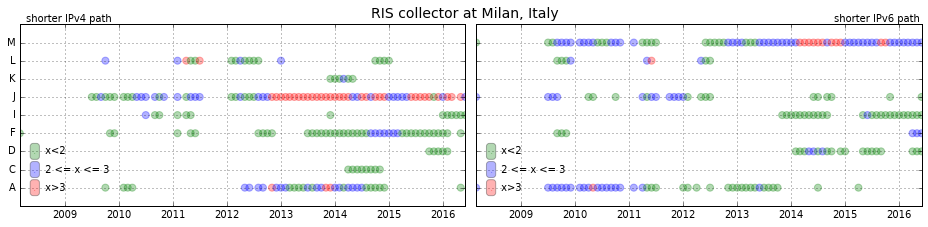

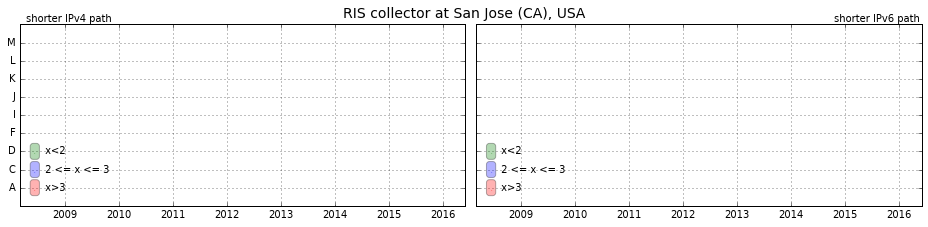

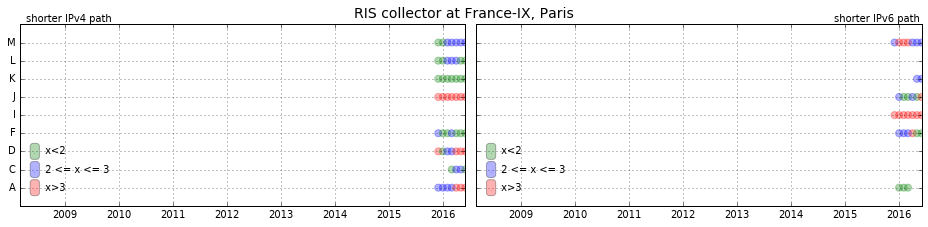

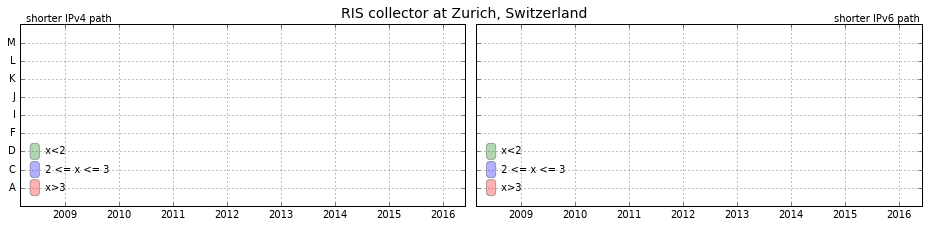

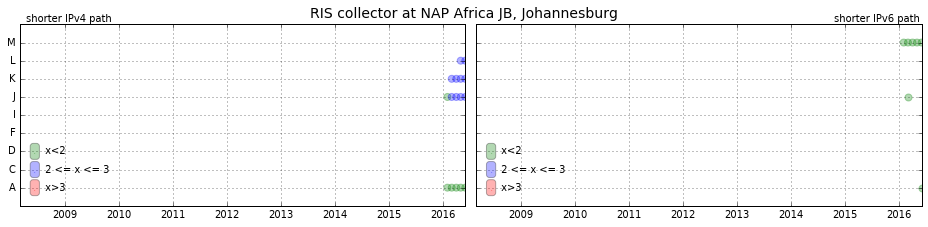

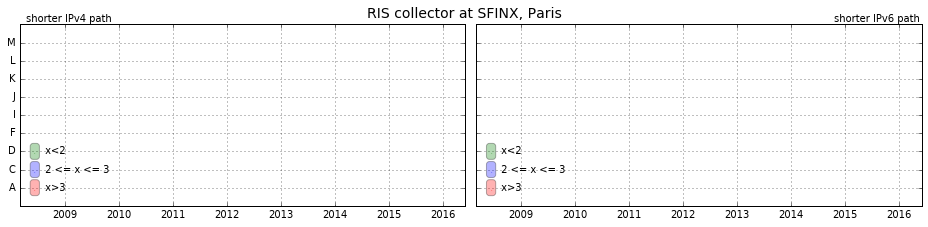

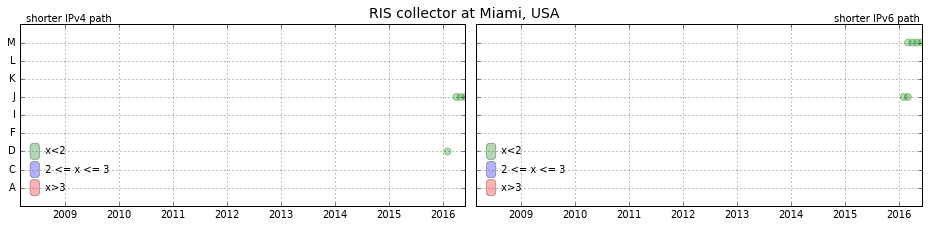

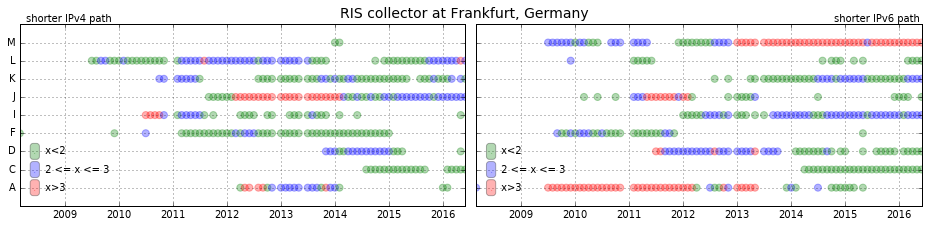

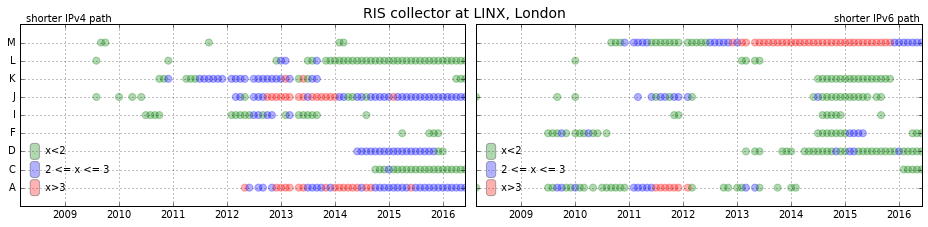

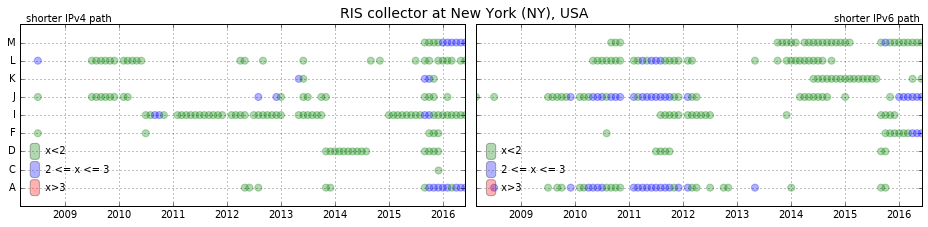

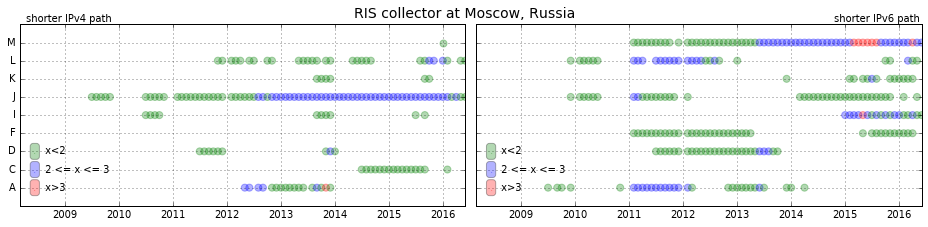

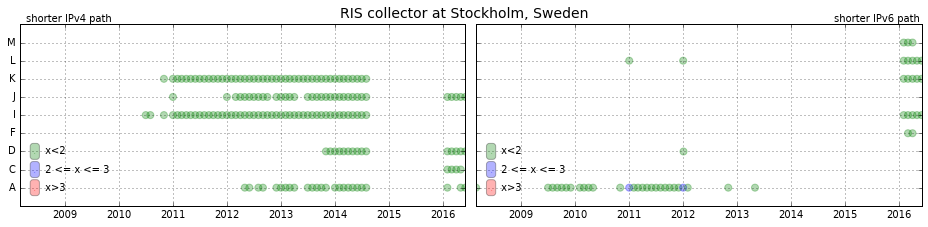

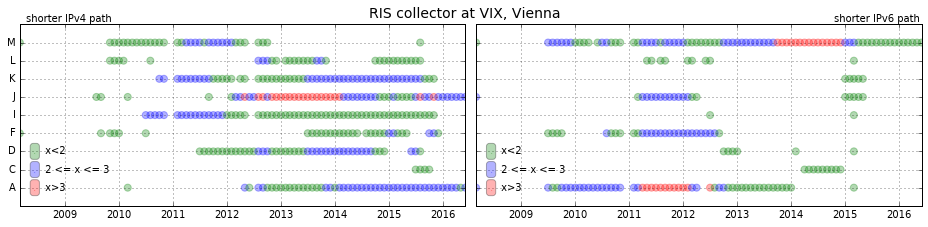

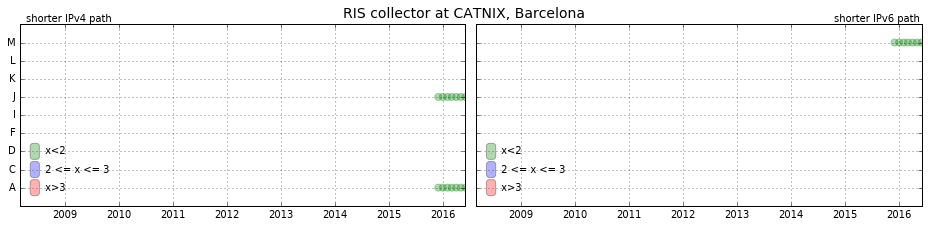

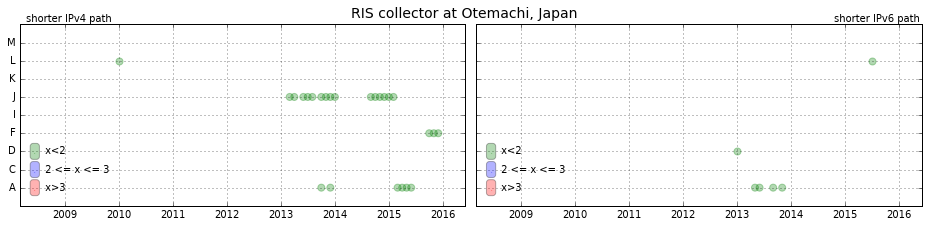

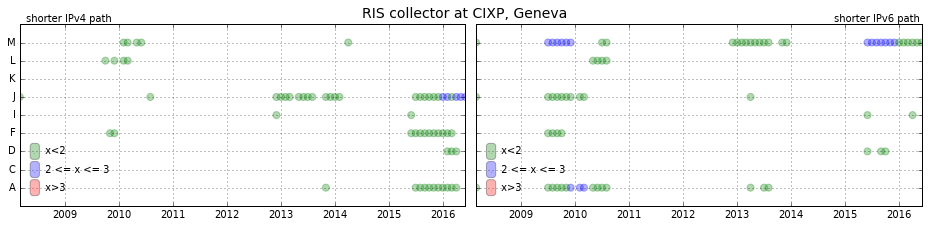

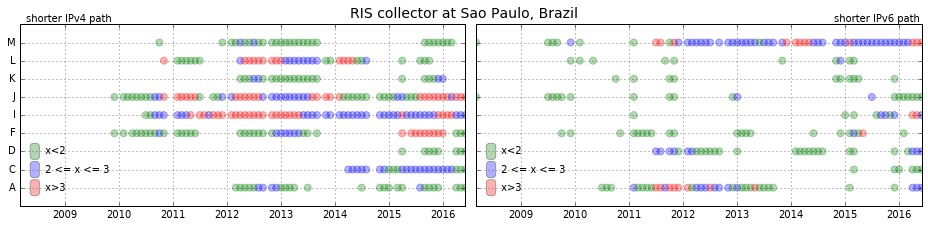

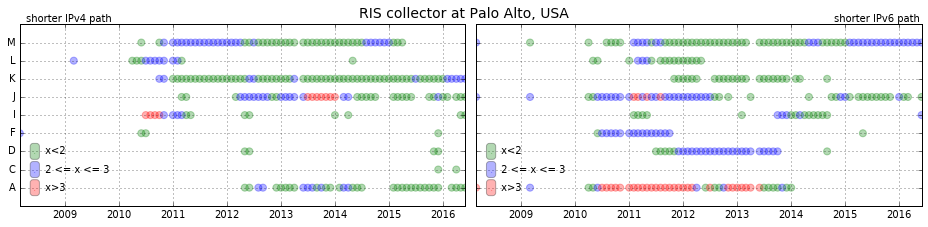

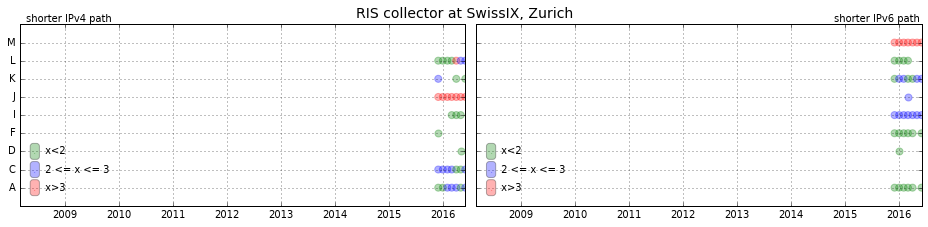

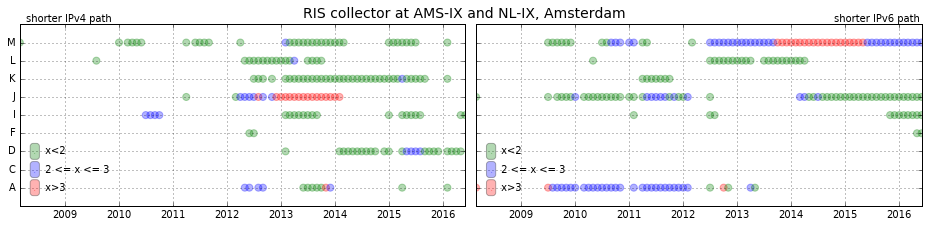

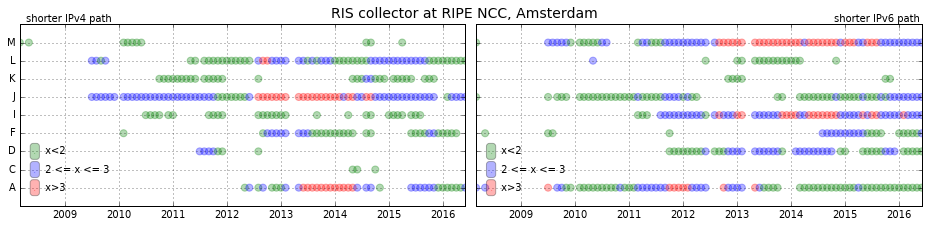

In [4]:
v4_shorter = """
function() {
    if(this.path4.length < this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

v6_shorter = """
function() {
    if(this.path4.length > this.path6.length ) {
        return true;
    } else {
        return false;
    }
}
"""

reducer = Code("""
    function(obj, prev) {
        prev.count++;
    }
""")

root_list = 'acdfijklm'

def get_color(r):
    try: 
        if r < 2:
            return 'green'
        if r == 2 or r == 3:
            return 'blue'
        if r > 3:
            return 'red'
    except ValueError:
        print('get error: r={}'.format(r))

container = {}
for collector in col_map:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,3), sharex=True, sharey=True)
    
    # shorter IPv4
    for root in root_list:
        coll = anycast['{}_root'.format(root)]
        counter = 0
        res = coll.group(key={'timestamp':1}, condition={'collector': collector, '$where': v4_shorter}, initial={'count': 0, 'root': root_list.index(root) + 1}, reduce=reducer)
        if res:
            container[collector] = DataFrame(res)
            container[collector]['timestamp'] = pd.to_datetime(container[collector]['timestamp'] * 1000000000)
            container[collector] = container[collector].set_index(['timestamp'])

            # plot
#             axes[0].scatter(container[collector].index, container[collector]['root'], s=container[collector]['count'] * 50, alpha=0.3, color='red')
            scatter0 = axes[0].scatter(container[collector].index, 
                            container[collector]['root'], 
                            s=50, 
                            alpha=0.3, 
                            color=[get_color(item) for item in container[collector]['count']])

    # shorter IPv6
    for root in root_list:
        coll = anycast['{}_root'.format(root)]
        counter = 0
        res = coll.group(key={'timestamp':1}, condition={'collector': collector, '$where': v6_shorter}, initial={'count': 0, 'root': root_list.index(root) + 1}, reduce=reducer)
        if res:
            container[collector] = DataFrame(res)
            container[collector]['timestamp'] = pd.to_datetime(container[collector]['timestamp'] * 1000000000)
            container[collector] = container[collector].set_index(['timestamp'])

            # plot
#             axes[1].scatter(container[collector].index, container[collector]['root'], s=container[collector]['count'] * 50, alpha=0.3, color='red')
            scatter1 = axes[1].scatter(container[collector].index, 
                            container[collector]['root'], 
                            s=50, 
                            alpha=0.3, 
                            color=[get_color(item) for item in container[collector]['count']])

    
    axes[0].set_xlim([pd.datetime(2008,3,1), pd.datetime(2016,6,1)])
    axes[0].set_ylim([0, 10])
    axes[1].set_xlim([pd.datetime(2008,3,1), pd.datetime(2016,6,1)])
    axes[1].set_ylim([0, 10])

    start, end = axes[0].get_ylim()
    axes[0].yaxis.set_ticks(np.arange(start, end, 1))
    axes[0].yaxis.set_ticklabels(['', 'A','C','D','F', 'I', 'J', 'K', 'L', 'M'])
    start, end = axes[1].get_ylim()
    axes[1].yaxis.set_ticks(np.arange(start, end, 1))
    axes[1].yaxis.set_ticklabels(['', 'A','C','D','F', 'I', 'J', 'K', 'L', 'M'])
    
    axes[0].text(0.11, 1.03, 'shorter IPv4 path', horizontalalignment='center', verticalalignment='center', transform= axes[0].transAxes, fontsize=10)
    axes[1].text(0.9, 1.03, 'shorter IPv6 path', horizontalalignment='center', verticalalignment='center', transform= axes[1].transAxes, fontsize=10)
    
    # "legend"
    for i in range(0,2):
        axes[i].text(0.05, 0.3, ' x<2', horizontalalignment='left', verticalalignment='center', transform= axes[i].transAxes, fontsize=10)
        axes[i].text(0.05, 0.2, ' 2 <= x <= 3', horizontalalignment='left', verticalalignment='center', transform= axes[i].transAxes, fontsize=10)
        axes[i].text(0.05, 0.1, ' x>3', horizontalalignment='left', verticalalignment='center', transform= axes[i].transAxes, fontsize=10)

        # color box for "legend"
    for i in range(0,2):
        axes[i].text(0.03, 0.3, '.', size=5, color='green', alpha=0.3,
                     horizontalalignment='left', verticalalignment='center', 
                     transform= axes[i].transAxes, fontsize=10, bbox=dict(boxstyle="round", fc="green", alpha=0.3))
        axes[i].text(0.03, 0.2, '.', size=5, color='blue', alpha=0.3,
                     horizontalalignment='left', verticalalignment='center', 
                     transform= axes[i].transAxes, fontsize=10, bbox=dict(boxstyle="round", fc="blue", alpha=0.3))
        axes[i].text(0.03, 0.1, '.', size=5, color='red', alpha=0.3,
                     horizontalalignment='left', verticalalignment='center', 
                     transform= axes[i].transAxes, fontsize=10, bbox=dict(boxstyle="round", fc="red", alpha=0.3))

    axes[0].grid(True)
    axes[1].grid(True)
    
    
    
    fig.suptitle('RIS collector at {}'.format(col_map[collector]), fontsize=14, x=0.5, y=1.03)
    plt.tight_layout()
    plt.show()


    

# How many peers (all of them: both identical and different) are connected to each collector?

In [19]:
from collections import Counter

m_root = anycast['m_root']

res = m_root.group(['timestamp'], None,
             {'list': []},
             'function(obj, prev) { prev.list.push(obj.collector)}')

cols = ['timestamp', '00', '01', '02', '03', '04', '05',
        '06', '07', '08', '09', '10', '11', '12', '13',
        '14', '15', '16', '18', '19', '20', '21']
df = DataFrame(columns=cols)

# enter the data to dataframe
for item in res:
    counter = Counter(item['list'])
    df.loc[len(df)] = [item['timestamp'], counter['00'], counter['01'], counter['02'], counter['03'], counter['04'], counter['05'], counter['06'],
                       counter['07'], counter['08'], counter['09'], counter['10'], counter['11'], counter['12'], counter['13'], counter['14'], counter['15'],
                       counter['16'], counter['18'], counter['19'], counter['20'], counter['21']]
    
df['timestamp'] = pd.to_datetime(df['timestamp'] * 1000000000)
df = df.set_index(['timestamp'])
df
    


00   01   02   03   04   05   06   07   08   09  ...    11    12  \
timestamp                                                     ...               
2008-03-01  2.0  1.0  0.0  3.0  1.0  2.0  0.0  1.0  0.0  0.0  ...   1.0   3.0   
2008-05-01  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2008-07-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   3.0   0.0   
2009-03-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2009-07-01  3.0  1.0  0.0  4.0  2.0  2.0  0.0  1.0  0.0  0.0  ...   3.0   6.0   
2009-08-01  3.0  1.0  0.0  4.0  2.0  2.0  0.0  1.0  0.0  0.0  ...   3.0   6.0   
2009-09-01  3.0  2.0  0.0  3.0  2.0  2.0  0.0  1.0  0.0  0.0  ...   2.0   7.0   
2009-10-01  3.0  2.0  0.0  3.0  2.0  2.0  0.0  1.0  0.0  0.0  ...   2.0   7.0   
2009-11-01  3.0  1.0  0.0  3.0  2.0  3.0  0.0  1.0  0.0  0.0  ...   2.0   7.0   
2009-12-01  2.0  1.0  0.0  3.0  2.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   7.0   
2010-01-01  0.0  2.0  0.0  3.0  0.0  3.0  1.0  0.0  0.0  0.0  ...   0.0   6.0   
2010-02-01  3.0  1.0  0.0  0.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   7.0   
2010-03-01  3.0  1.0  0.0  3.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   6.0   
2010-04-01  3.0  1.0  0.0  3.0  0.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   5.0   
2010-05-01  3.0  1.0  0.0  3.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   5.0   
2010-06-01  3.0  1.0  0.0  3.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   3.0   4.0   
2010-07-01  3.0  1.0  0.0  3.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   2.0   3.0   
2010-08-01  3.0  1.0  0.0  3.0  1.0  3.0  0.0  1.0  0.0  0.0  ...   1.0   3.0   
2010-09-01  3.0  1.0  0.0  3.0  0.0  3.0  0.0  0.0  0.0  0.0  ...   2.0   5.0   
2010-10-01  3.0  1.0  0.0  3.0  0.0  3.0  0.0  0.0  0.0  0.0  ...   2.0   5.0   
2010-11-01  3.0  1.0  0.0  3.0  0.0  3.0  0.0  1.0  0.0  0.0  ...   2.0   4.0   
2010-12-01  3.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2011-01-01  3.0  0.0  0.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  ...   0.0   0.0   
2011-02-01  3.0  2.0  0.0  3.0  0.0  3.0  0.0  1.0  0.0  0.0  ...   1.0   6.0   
2011-03-01  4.0  2.0  0.0  0.0  0.0  3.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
2011-04-01  4.0  3.0  0.0  3.0  0.0  5.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
2011-05-01  4.0  3.0  0.0  3.0  0.0  5.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
2011-06-01  4.0  2.0  0.0  3.0  0.0  5.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
2011-07-01  4.0  3.0  0.0  3.0  0.0  5.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
2011-08-01  4.0  3.0  0.0  3.0  0.0  4.0  0.0  1.0  0.0  0.0  ...   1.0   7.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
2014-01-01  8.0  6.0  0.0  6.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-02-01  8.0  6.0  0.0  6.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-03-01  8.0  6.0  0.0  6.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-04-01  6.0  6.0  0.0  6.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-05-01  8.0  6.0  0.0  5.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-06-01  7.0  6.0  0.0  5.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-07-01  6.0  6.0  0.0  5.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-08-01  6.0  6.0  0.0  5.0  1.0  6.0  1.0  1.0  0.0  0.0  ...   1.0  10.0   
2014-09-01  6.0  6.0  0.0  5.0  1.0  6.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2014-10-01  5.0  6.0  0.0  5.0  1.0  5.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2014-11-01  6.0  6.0  0.0  5.0  1.0  5.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2014-12-01  5.0  6.0  0.0  5.0  1.0  5.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2015-01-01  5.0  6.0  0.0  6.0  1.0  4.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2015-02-01  5.0  6.0  0.0  6.0  1.0  4.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2015-03-01  5.0  6.0  0.0  6.0  1.0  4.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2015-04-01  5.0  6.0  0.0  6.0  1.0  4.0  1.0  0.0  0.0  0.0  ...   1.0  10.0   
2015-05-01  5.0  6.0  0.0  6.0  1.0  4.0  1.

### Plot

/home/arif/Github/Thesis-Code/env/lib/python3.5/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


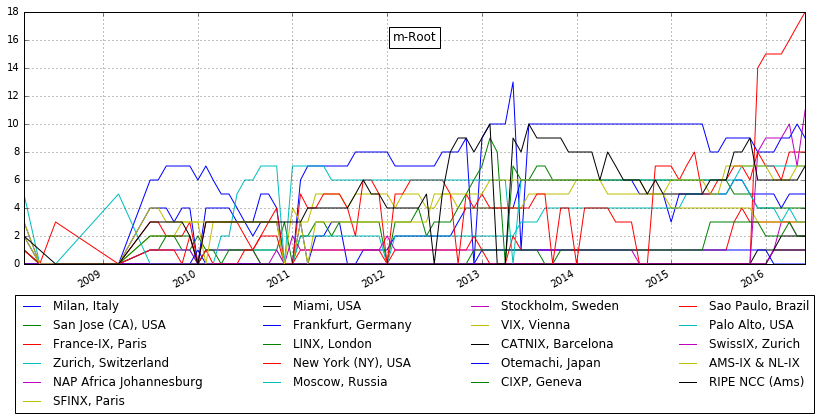

In [54]:
fig, ax = plt.subplots(figsize=(14,5))

for collector in col_map:
    df[collector].plot(axes=ax, label=col_map[collector])

# control the root title
ax.text(0.5, 
        0.9, 
        '{}-Root'.format('m'),
        horizontalalignment='center',
        verticalalignment='center',
        transform= ax.transAxes,
        fontsize=12,
        bbox={'facecolor':'white', 'pad':4})
    
# control the legend box
plt.legend(loc='lower center',
          bbox_to_anchor=(0.11, -0.23, 0.805, 1),
          bbox_transform=plt.gcf().transFigure,
          ncol=4,
          mode='expand')
plt.grid(True)
plt.show()

### Put it together

/home/arif/Github/Thesis-Code/env/lib/python3.5/site-packages/matplotlib/artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


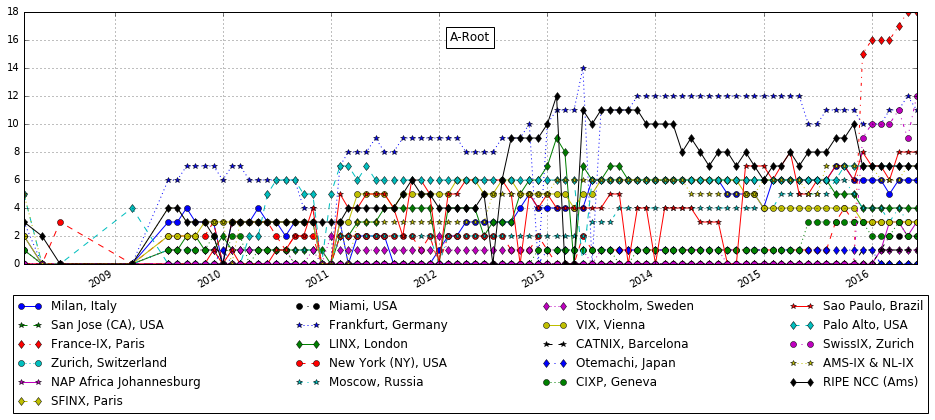

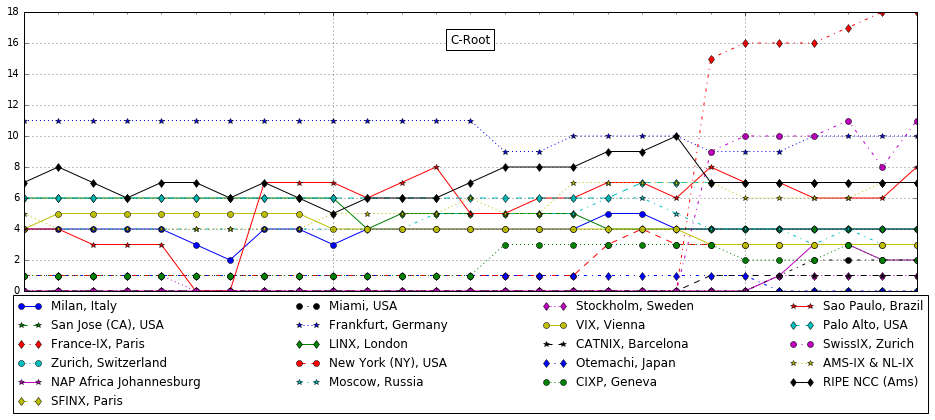

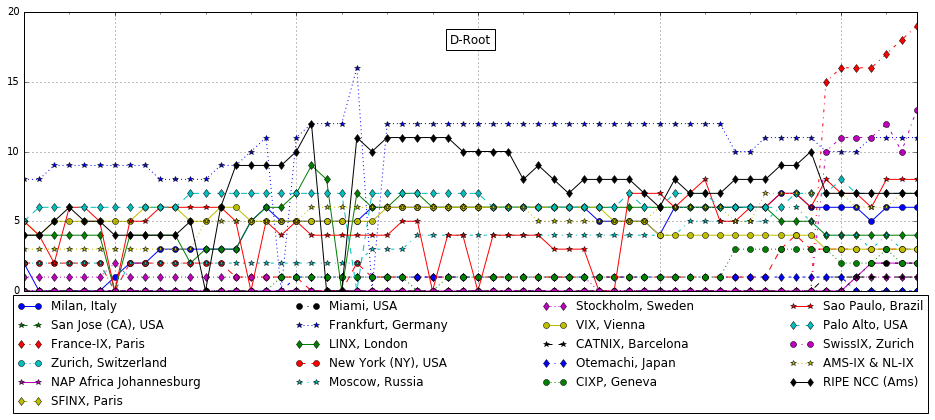

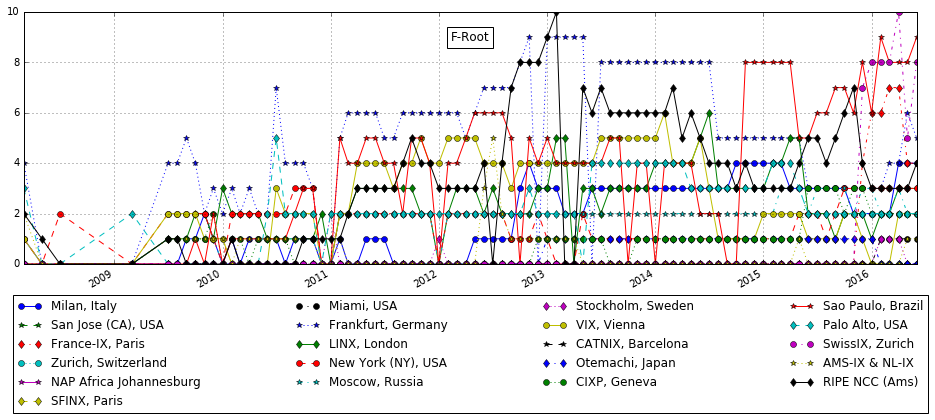

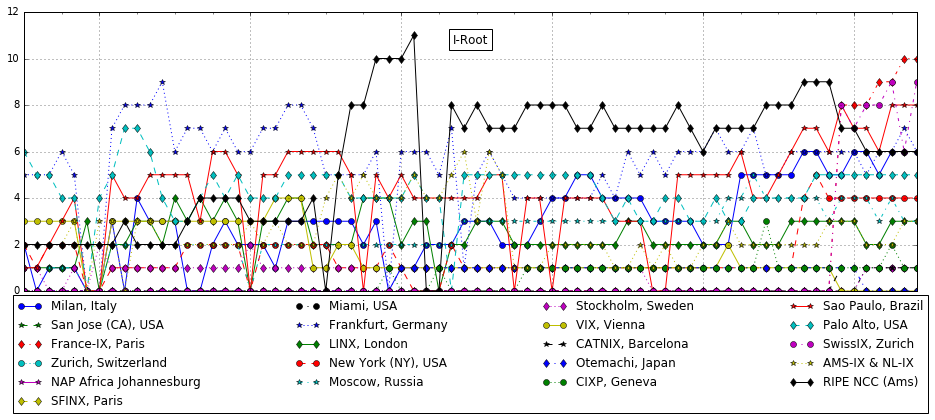

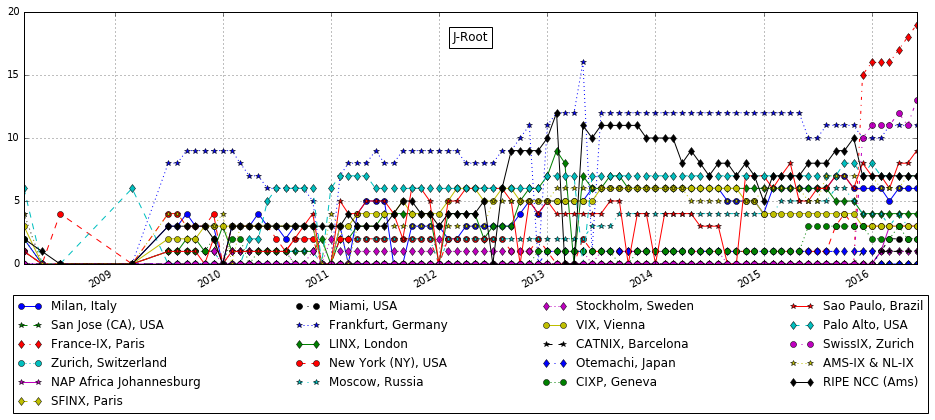

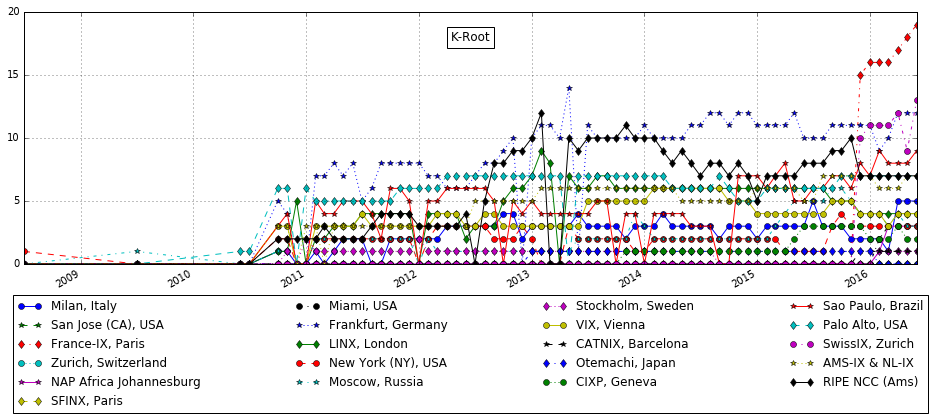

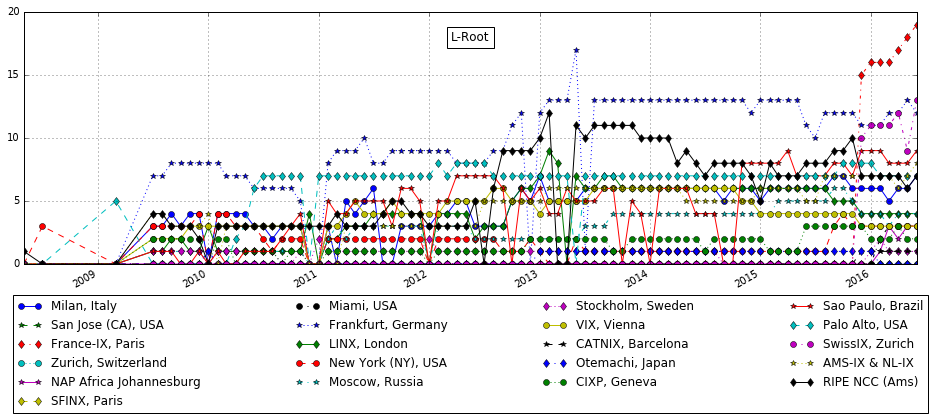

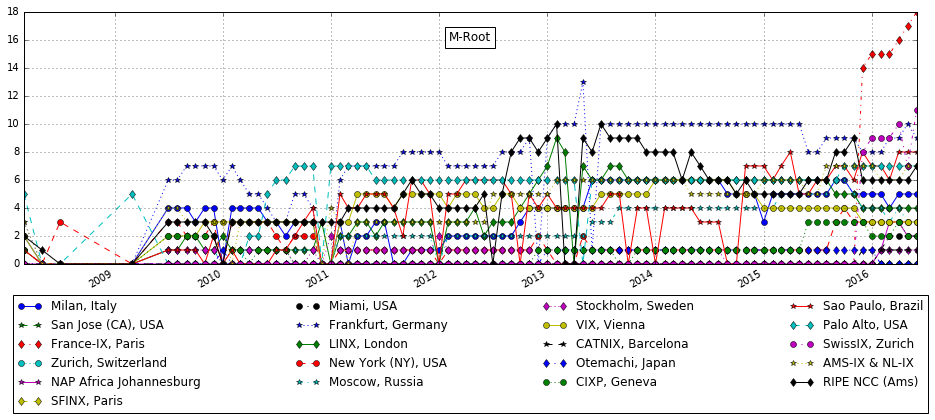

In [59]:
from collections import Counter
from itertools import cycle

for root in root_list:
    coll = anycast['{}_root'.format(root)]

    res = coll.group(['timestamp'], None,
                 {'list': []},
                 'function(obj, prev) { prev.list.push(obj.collector)}')

    cols = ['timestamp', '00', '01', '02', '03', '04', '05',
            '06', '07', '08', '09', '10', '11', '12', '13',
            '14', '15', '16', '18', '19', '20', '21']
    df = DataFrame(columns=cols)

    # enter the data to dataframe
    for item in res:
        counter = Counter(item['list'])
        df.loc[len(df)] = [item['timestamp'], counter['00'], counter['01'], counter['02'], counter['03'], counter['04'], counter['05'], counter['06'],
                           counter['07'], counter['08'], counter['09'], counter['10'], counter['11'], counter['12'], counter['13'], counter['14'], counter['15'],
                           counter['16'], counter['18'], counter['19'], counter['20'], counter['21']]

    df['timestamp'] = pd.to_datetime(df['timestamp'] * 1000000000)
    df = df.set_index(['timestamp'])
        
    # Plot
    fig, ax = plt.subplots(figsize=(16,5))
    
    # line and marker styles
    lines = ["-","--","-.",":"]
    markers = ['o', '*', 'd']
    linecycler = cycle(lines)
    markercycler = cycle(markers)

    for collector in col_map:
        df[collector].plot(axes=ax, label=col_map[collector], style=next(linecycler), marker=next(markercycler))

    # control the root title
    ax.text(0.5, 
            0.9, 
            '{}-Root'.format(root.upper()),
            horizontalalignment='center',
            verticalalignment='center',
            transform= ax.transAxes,
            fontsize=12,
            bbox={'facecolor':'white', 'pad':4})

    # control the legend box
    plt.legend(loc='lower center',
              bbox_to_anchor=(0.11, -0.23, 0.805, 1),
              bbox_transform=plt.gcf().transFigure,
              ncol=4,
              mode='expand')
    plt.grid(True)
    plt.show()    

===================================================================================================================

In [25]:
test = pd.Series()
for collector in container:
    test = test.append(container[collector]['count'])
#     print(type(container[collector]['count']))
test.describe()


count    719.000000
mean       2.497914
std        1.432680
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64

### which peers have the most inequal IPv4/IPv6 path?

In [1]:
container

NameError: name 'container' is not defined